# Homework 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [20]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Spam Calls


## Part 1: 585 Fun

Dr. McLean gets a lot of spam calls. An area code is defined to be a three digit number from 200-999 inclusive. In reality, many of these area codes are not in use. Of these possible numbers, there are currently 317 geographical US area codes (there are others not based on geography). 

**Throughout these questions, you should assume that Dr. McLean's area code is 585 (Rochester NY, home of the [garbage plate](https://www.visitrochester.com/blog/post/rochester-garbage-plate/)).**

**Question 1.** Assuming each area code is just as likely as any other, what's the probability that the area code of two back to back spam calls are 585?


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [21]:
prob_585 = (1/317)*(1/317)
prob_585

9.95133795738837e-06

**Question 2.** Peter already knows that Dr. McLean's area code is 585. Peter randomly guesses the last 7 digits (0-9 inclusive) of his phone number. What's the probability that Peter correctly guesses Dr. McLean's number, assuming that he’s equally likely to choose any digit? Assume that any digit is possible in any position of the phone number (in reality, this is not the case).

*Note: A phone number contains an area code and 7 additional digits, i.e. xxx-xxx-xxxx*

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [22]:
prob_mclean_num = (1/10)**7
prob_mclean_num

1.0000000000000004e-07

Dr. McLean suspects that there's a higher chance that the spammers are using his area code (585) to trick him into thinking it's someone from his area calling him. Stephanie thinks that this is not the case, and that spammers are just choosing area codes of the spam calls at random from all 317 possible US geographical area codes. Dr. McLean wants to test his claim using the 50 spam calls he received in the past month.

Here's a dataset of the area codes of the 50 spam calls he received in the past month.

In [23]:
# Just run this cell
spam = Table().read_table('../Datasets/spam.csv')
spam

Area Code
810
630
205
440
585
304
870
610
717
332


**Question 3.** Define the null hypothesis and alternative hypothesis for this investigation. 

*Hint: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

Ho: Spammers use familiar area codes
Ha: Spammers use random area codes, AKA Spammers do not use familiar area codes

**Question 4.** Which of the following test statistics would be a reasonable choice to help differentiate between the two hypotheses?

*Hint*: For a refresher on choosing test statistics, check out the textbook section on [Test Statistics](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-2-the-test-statistic).

1. The proportion of area codes that are 585 in 50 random spam calls
2. The total variation distance (TVD) between probability distribution of randomly chosen area codes, and the observed distribution of area codes. (*Remember the possible area codes are 200-999 inclusive*)
3. The probability of getting an area code of 585 out of all the possible area codes.
4. The proportion of area codes that are 585 in 50 random spam calls divided by 2
5. The number of times you see the area code 585 in 50 random spam calls

Assign `reasonable_test_statistics` to an array of numbers corresponding to these test statistics.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [24]:
reasonable_test_statistics = 2

**For the rest of this question, suppose you decide to use the number of times you see the area code 585 in 50 spam calls as your test statistic.**

**Question 5.** 
Write a function called `simulate` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that each area code is sampled with equal probability. The `AreaCodes` table contains all US geographical area codes. Your function should return the number of times you saw the 585 area code in those 50 random spam calls.


<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [41]:
import pandas as pd 

In [42]:
AreaCodes = Table.read_table('../Datasets/AreaCodes.csv')
AreaCodes_df = pd.read_csv('../Datasets/AreaCodes.csv')

In [75]:
# # Making sure things work before putting them into a function 
# rand_sample = AreaCodes_df.sample(50).reset_index()
# # Count how many times this sample has the value 585 
# points = 0 
# for x in np.arange(0, len(rand_sample), 1):
#     if rand_sample["Area Code"][x] == 585:
#         points = points + 1
# points

1

In [103]:
# We want a function, that takes no arguments 
# IT should sample something 50 times, and count how many times it sees the area code 585

def simulate():
    rand_sample = AreaCodes_df.sample(50).reset_index()
    # Count how many times this sample has the value 585 
    points = 0 
    for x in np.arange(0, len(rand_sample), 1):
        if rand_sample["Area Code"][x] == 585:
            points = points + 1
    return points
        
    
# Call your function to make sure it works
simulate()

0

**Question 6.** Generate 20,000 simulated values of the number of times you see the area code 585 in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 5.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [104]:
test_statistics_under_null = []
repetitions = 20000

for i in np.arange(repetitions):
    test_statistics_under_null.append(simulate())

    
sum(test_statistics_under_null)

3042

**Question 7.** Using the results from Question 6, generate a histogram of the empirical distribution of the number of times you saw the area code 585 in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_7
manual: true
-->
<!-- EXPORT TO PDF -->

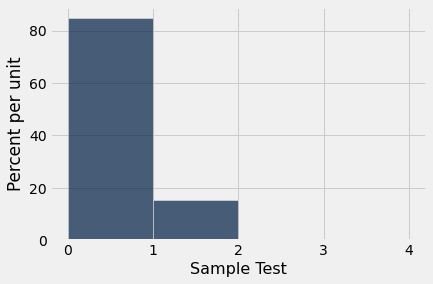

In [105]:
bins = np.arange(0,5,1) # Use these provided bins
Table().with_column("Sample Test", test_statistics_under_null).hist(bins = bins)

# This says that the majority of the time, it only shows up once in a set of 50 calls 

**Question 8.** Compute an empirical P-value for this test.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [127]:
import math as math 
# First calculate the observed value of the test statistic from the `spam` table.
observed_val = sum(test_statistics_under_null)
print(observed_val)
expected_value = (1/317) # Probability of 585 number in one call
print(expected_value)
pvalue = (observed_val - expected_value)/repetitions
pvalue

3042
0.0031545741324921135


0.15209984227129336

**Question 9.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

Since the p-value is greater than the alpha, we fail to reject the null hypothesis.

## Part 2: Multiple Spammers

Instead of checking if the area code is equal to his own, Dr. McLean decides to check if the area code matches the area code of one of the 8 places he's been to recently, and wants to test if it's more likely to receive a spam call with an area code from any of those 8 places. These are the area codes of the places he's been to recently: 585, 919, 910, 315, 607, 707, 610, 864.

##### **Question 10.** Define the null hypothesis and alternative hypothesis for this investigation.

*Reminder: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

Ho: Dr.McLean will have more calls from 585, 919, 910, 315, 607, 707, 610, and 864 area code spammer calls 

Ha: Dr.McLean will not have more calls from 585, 919, 910, 315, 607, 707, 610, and 864 area code spammer calls 

**Suppose you decide to use the number of times you see any of the area codes of the places Dr. McLean has been to in 50 spam calls as your test statistic.**

**Question 11.** 
Write a function called `simulate_visited_area_codes` that generates exactly one simulated value of your test statistic under the null hypothesis. It should take no arguments and return the number of times that you saw any of the area codes of the places Dr. McLean has been to in those 50 spam calls (under the assumption that the calls come from the 317 US geographical area codes with equal probability).
 

*Hint*: You may find the textbook [section](https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html#simulating-one-value-of-the-statistic) on the `sample_proportions` function to be useful.

<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [11]:
model_proportions = ...
def simulate_visited_area_codes():
    ...
    
# Call your function to make sure it works
simulate_visited_area_codes()

**Question 12.** Generate 20,000 simulated values of the number of times you see any of the area codes of the places Dr. McLean has been to in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 11.

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [12]:
visited_test_statistics_under_null = ...

repetitions = ...
...
visited_test_statistics_under_null

Ellipsis

**Question 13.** Using the results from Question 12, generate a histogram of the empirical distribution of the number of times you saw any of the area codes of the places Dr. McLean has been to in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->
<!-- EXPORT TO PDF -->

In [13]:
bins_visited = np.arange(0,6,1) # Use these provided bins
...

**Question 14.** Compute an empirical P-value for this test.


<!--
BEGIN QUESTION
name: q1_14
manual: false
-->

In [14]:
visited_area_codes = make_array(585, 919, 910, 315, 607, 707, 610, 864)
# First calculate the observed value of the test statistic from the `spam` table.
visited_observed_value = ...
p_value = ...
p_value

Ellipsis

**Question 15.** Suppose you use a P-value cutoff of 0.5% (**Note: that’s 0.5%, not our usual cutoff of 5%**). What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_15
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 16.** Is `p_value`:

* (a) the probability that the spam calls favored the visited area codes,
* (b) the probability that they didn't favor, or
* (c) neither

If you chose (c), explain what it is instead.


<!--
BEGIN QUESTION
name: q1_16
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 17.** Is 0.5% (the P-value cutoff):

* (a) the probability that the spam calls favored the visited area codes,
* (b) the probability that they didn't favor, or
* (c) neither

If you chose (c), explain what it is instead.

<!--
BEGIN QUESTION
name: q1_17
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 18.** Suppose you run this test for 600 different people after observing each person's last 50 spam calls. When you reject the null hypothesis for a person, you accuse the spam callers of favoring the area codes that person has visited. If the spam callers were not actually favoring area codes that people have visited, can we compute how many times we will incorrectly accuse the spam callers of favoring area codes that people have visited? If so, what is the number? Explain your answer. Assume a 0.5% P-value cutoff.

<!--
BEGIN QUESTION
name: q1_18
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## Part 3: Practice with A/B Tests

Dr. McLean collects information about this month's spam calls. The table `with_labels` is a sampled table, where the `Area Code Visited` column contains either `"Yes"` or `"No"` which represents whether or not Dr. McLean has visited the location of the area code. The `Picked Up` column is `1` if Dr. McLean picked up and `0` if he did not pick up. Honestly, unless it's Dr. McLean's family calling, He's not answering the phone...

In [28]:
# Just run this cell
with_labels = Table().read_table("../Datasets/spam_picked_up.csv")
with_labels

Area Code Visited,Picked Up
No,0
No,1
No,1
Yes,0
No,0
No,0
Yes,0
No,1
No,1
No,1


In [15]:
# Just run this cell
with_labels = Table().read_table("spam_picked_up.csv")
with_labels

FileNotFoundError: [Errno 2] No such file or directory: 'spam_picked_up.csv'

Dr. McLean is going to perform an A/B Test to see whether or not he is more likely to pick up a call from an area code he has visited. Specifically, his null hypothesis is that there is no difference in the distribution of calls he picked up between visited and not visited area codes, with any difference due to chance. His alternative hypothesis is that there is a difference between the two categories, specifically that he thinks that he is more likely to pick up if he has visited the area code. We are going to perform a [permutation test](https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html#Permutation-Test) to test this. Our test statistic will be the difference in proportion of calls picked up between the area codes Dr. McLean visited and the area codes he did not visit.

**Question 19.** Complete the `difference_in_proportion` function to have it calculate this test statistic, and use it to find the observed value. The function takes in a sampled table which can be any table that has the same columns as `with_labels`. We'll call `difference_in_proportion` with the sampled table `with_labels` in order to find the observed difference in proportion.

<!--
BEGIN QUESTION
name: q1_19
manual: false
-->

In [ ]:
def difference_in_proportion(sample):
    # Take a look at the code for `proportion_visited` and use that as a 
    # hint of what `proportions` should be assigned to
    proportions = ...
    proportion_visited = proportions.where("Area Code Visited", "Yes").column("Picked Up mean").item(0)
    proportion_not_visited = proportions.where("Area Code Visited", "No").column("Picked Up mean").item(0)
    ...

observed_diff_proportion = difference_in_proportion(with_labels)
observed_diff_proportion

**Question 20.** To perform a permutation test we shuffle the labels, because our null hypothesis is that the labels don't matter because the distribution of calls he picked up between visited and not visited area codes come from same underlying distribution. The labels in this case is the `"Area Code Visited"` column containing `"Yes"` and `"No"`.

Write a function to shuffle the table and return a test statistic using the function you defined in question 19.

*Hint: To shuffle labels, we sample without replacement and then replace the appropriate column with the new shuffled column.*

<!--
BEGIN QUESTION
name: q1_20
manual: false
-->

In [ ]:
def simulate_one_stat():
    shuffled = ...
    original_with_shuffled_labels = ...
    return difference_in_proportion(original_with_shuffled_labels)

one_simulated_test_stat = simulate_one_stat() 
one_simulated_test_stat

**Question 21.** Generate 1,000 simulated test statistic values. Assign `test_stats` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 20.

We also provided code that'll generate a histogram for you after generating a 1000 simulated test statistic values.

<!--
BEGIN QUESTION
name: q1_21
manual: true
-->
<!-- EXPORT TO PDF -->

In [ ]:
trials = ...
test_stats = ...

...

# here's code to generate a histogram of values and the red line is the observed value
Table().with_column("Simulated Proportion Difference", test_stats).hist("Simulated Proportion Difference");
plt.plot([observed_diff_proportion, observed_diff_proportion], [0, 3], color='red', lw=2);

**Question 22.** Compute the empirical p-value for this test, and assign it to `p_value_ab`.

<!--
BEGIN QUESTION
name: q1_22
manual: false
-->

In [ ]:
p_value_ab = ...
p_value_ab